## Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [3]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
df1 = df.dropna(subset=['Gender'])
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Married'] = df1['Married'].fillna(df1['Married'].mode().values[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode().values[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode().values[0])
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode().values[0])
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode().values[0])
df1

C:\Users\master\AppData\Local\Temp\ipykernel_4548\819822364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
C:\Users\master\AppData\Local\Temp\ipykernel_4548\819822364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Married'] = df1['Married'].fillna(df1['Married'].mode().values[0])
C:\Users\master\AppData\Local\Temp\ipykernel_4548\819822364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,145.017271,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [5]:
# Checking the Missing Values again
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [6]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
df1.Gender=df1.Gender.map({'Male':1,'Female':0})
df1.Married=df1.Married.map({'Yes':1,'No':0})
df1.Education=df1.Education.map({'Graduate':1,'Not Graduate':0})
df1.Self_Employed=df1.Self_Employed.map({'Yes':1,'No':0})
df1.Loan_Status=df1.Loan_Status.map({'Y':1,'N':0})
df1.Property_Area=df1.Property_Area	.map({'Urban':1,'Semiurban':2,'Rural':3})
df1.Dependents=df1.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df1.index = range(df1.shape[0])
df1

C:\Users\master\AppData\Local\Temp\ipykernel_4548\1152915857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Gender=df1.Gender.map({'Male':1,'Female':0})
C:\Users\master\AppData\Local\Temp\ipykernel_4548\1152915857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Married=df1.Married.map({'Yes':1,'No':0})
C:\Users\master\AppData\Local\Temp\ipykernel_4548\1152915857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,145.017271,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,3,1
597,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,3,1
598,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
599,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    int64  
 1   Married            601 non-null    int64  
 2   Dependents         601 non-null    int64  
 3   Education          601 non-null    int64  
 4   Self_Employed      601 non-null    int64  
 5   ApplicantIncome    601 non-null    int64  
 6   CoapplicantIncome  601 non-null    float64
 7   LoanAmount         601 non-null    float64
 8   Loan_Amount_Term   601 non-null    float64
 9   Credit_History     601 non-null    float64
 10  Property_Area      601 non-null    int64  
 11  Loan_Status        601 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 56.5 KB


## Data process

In [8]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

import numpy as np
shuffle_index = pd.DataFrame(data=list(range(df1.shape[0])),columns=["INDEX"])
for i in list(range(5)):
    shuffle_index[i]=np.random.permutation(df1.shape[0])
#shuffle_index.to_csv('shuffle_index.csv')
shuffle_index.drop('INDEX',axis=1,inplace=True)
np.transpose(shuffle_index.values)
#用于数据洗牌

array([[460,  42, 530, ..., 262, 213,  30],
       [ 96, 561, 472, ...,  48, 377, 308],
       [ 43,  88, 361, ..., 467, 341, 224],
       [398, 335,  33, ..., 577, 568, 119],
       [495, 343, 158, ..., 551, 284, 318]])

In [9]:
df_MinMax = df1.apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [10]:
train_index = np.transpose(shuffle_index.values)[0][0:481]
test_index = np.transpose(shuffle_index.values)[0][481:602]
train_features = df_MinMax[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area',]].loc[train_index].values
train_labels = np.transpose(np.mat(df1['Loan_Status'].loc[train_index].values))
test_features = df_MinMax[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area',]].loc[test_index].values
test_labels = np.transpose(np.mat(df1['Loan_Status'].loc[test_index].values))


## Train

In [16]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression()
model.__init__(penalty="l2",gamma=1,fit_intercept=True)
model.fit(X = train_features, y = train_labels,lr=1)
# Task4 tr
# ain your model and plot the loss curve of training

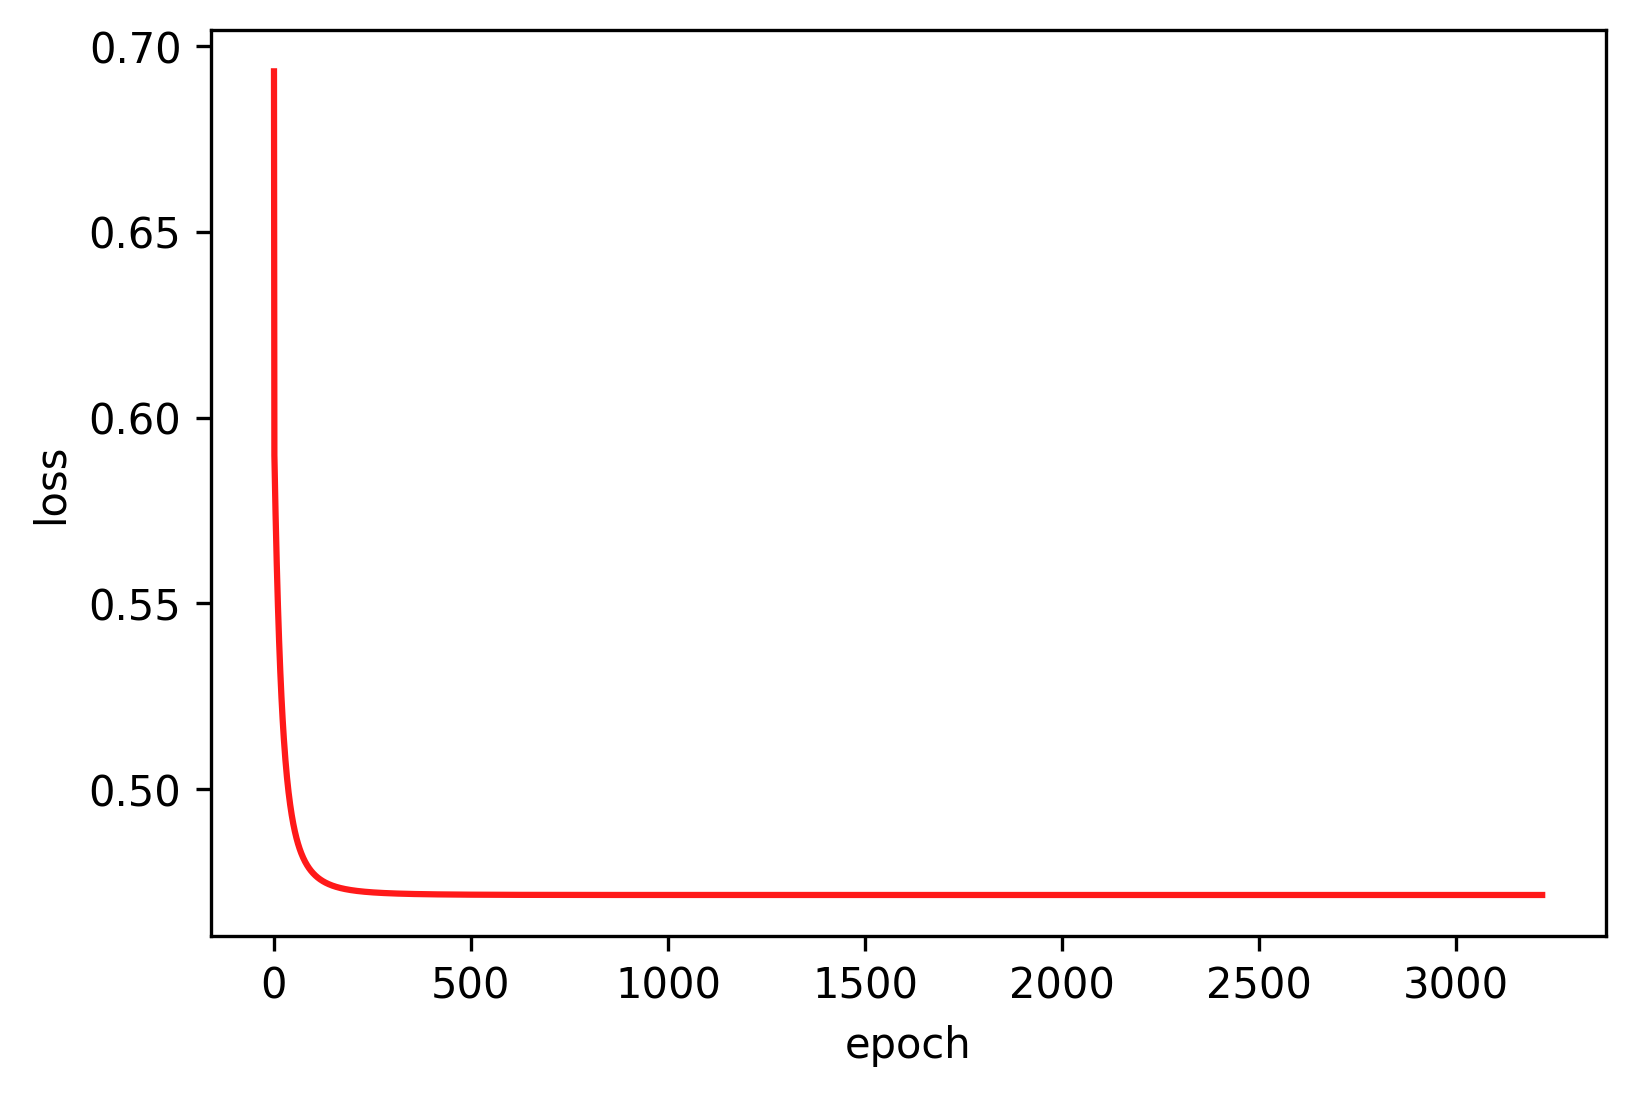

In [17]:
model.ShowLoss()

## Test

In [13]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
pred = model.predict(test_features)
j = 0
for i in list(range(len(pred))):
    if pred[i][0] >= 0.5:
        pred[i][0] = 1
    else:
        pred[i][0] = 0
    if pred[i][0] == test_labels[i]:
        j += 1
acc = j / len(pred)
print(acc)


0.8333333333333334


## Cross Validation

In [14]:


acc = []
epoch = []
for a in range(5):
    for b in range(5):
        list1 = [0,1,2,3,4]
        list1.remove(b)
        index = [np.transpose(shuffle_index.values)[a][0:120],np.transpose(shuffle_index.values)[a][120:240],np.transpose(shuffle_index.values)[a][240:360],np.transpose(shuffle_index.values)[a][360:480],np.transpose(shuffle_index.values)[a][480:602]]
        train_index = np.concatenate([index[list1[0]], index[list1[1]], index[list1[2]], index[list1[3]]])
        test_index = index[b]
        train_features = df_MinMax[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area',]].loc[train_index].values
        train_labels = np.transpose(np.mat(df1['Loan_Status'].loc[train_index].values))
        test_features = df_MinMax[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area',]].loc[test_index].values
        test_labels = np.transpose(np.mat(df1['Loan_Status'].loc[test_index].values))
        model = LogisticRegression()
        model.__init__(penalty="l2",gamma=1,fit_intercept=True)
        model.fit(X = train_features, y = train_labels, lr=1)
        epoch.append(model.epoch)
        pred = model.predict(test_features)
        j = 0
        for i in list(range(len(pred))):
            if pred[i][0] >= 0.5:
                pred[i][0] = 1
            else:
                pred[i][0] = 0
            if pred[i][0] == test_labels[i]:
                j += 1
        acc.append(j / len(pred)) 
print(sum(acc)/len(acc))
print(sum(epoch)/len(epoch))






















































0.8083140495867771
3284.08
